In [1]:
import pandas as pd

train_df = pd.read_excel("../data/train(1).xlsx")
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [2]:
sample = train_df.iloc[0]
lat = sample["lat"]
lon = sample["long"]

lat, lon

(47.4362, -122.187)

In [3]:
pip install contextily geopandas

Note: you may need to restart the kernel to use updated packages.


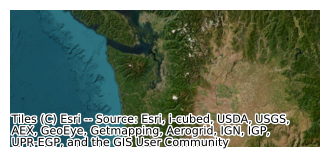

In [4]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    geometry=[Point(lon, lat)],
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Plot satellite image
ax = gdf.plot(figsize=(4, 4), alpha=0)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

plt.axis("off")
plt.show()

In [5]:
import os
import matplotlib.pyplot as plt

# Ensure folder exists
os.makedirs("../data/satellite_images", exist_ok=True)

property_id = sample["id"]
output_path = f"../data/satellite_images/{property_id}.png"

# Save figure
plt.savefig(output_path, bbox_inches="tight", dpi=150)
plt.close()

output_path

'../data/satellite_images/9117000170.png'

In [6]:
for idx, row in train_df.iterrows():
    lat = row["lat"]
    lon = row["long"]
    prop_id = row["id"]

    gdf = gpd.GeoDataFrame(
        geometry=[Point(lon, lat)],
        crs="EPSG:4326"
    ).to_crs(epsg=3857)

    fig, ax = plt.subplots(figsize=(4, 4))
    gdf.plot(ax=ax, alpha=0)
    ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

    ax.axis("off")

    save_path = f"../data/satellite_images/{prop_id}.png"
    plt.savefig(save_path, bbox_inches="tight", dpi=150)
    plt.close()

    if idx == 20:  # temporary safety break
        break

In [7]:
import os

img_dir = "../data/satellite_images"
print(len(os.listdir(img_dir)))
os.listdir(img_dir)[:5]

21


['4139490210.png',
 '7968460240.png',
 '7212660540.png',
 '9117000170.png',
 '7154200070.png']

In [8]:
train_df["image_path"] = train_df["id"].apply(
    lambda x: f"../data/satellite_images/{x}.png"
)

In [9]:
train_df[["id", "image_path"]].head()

,id,image_path
0,9117000170,../data/satellite_images/9117000170.png
1,6700390210,../data/satellite_images/6700390210.png
2,7212660540,../data/satellite_images/7212660540.png
3,8562780200,../data/satellite_images/8562780200.png
4,7760400350,../data/satellite_images/7760400350.png


(-0.5, 494.5, 236.5, -0.5)

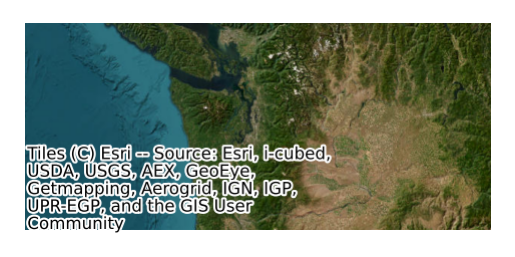

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(train_df.iloc[0]["image_path"])
plt.imshow(img)
plt.axis("off")

## Satellite Image Preprocessing

In this section, i prepared the downloaded satellite images for deep learning by
resizing them to a fixed size and ensuring consistent color channels before
feeding them into a CNN.

In [11]:
IMG_SIZE = (224, 224)   # standard for CNNs
CHANNELS = 3            # RGB

In [12]:
from PIL import Image
import numpy as np

def preprocess_image(img_path, img_size=(224, 224)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0  # normalize
    return img_array

In [13]:
sample_path = train_df.iloc[0]["image_path"]
img_arr = preprocess_image(sample_path)

img_arr.shape

(224, 224, 3)

In [14]:
image_arrays = []
valid_ids = []

for idx, row in train_df.iterrows():
    try:
        img_arr = preprocess_image(row["image_path"])
        image_arrays.append(img_arr)
        valid_ids.append(row["id"])
    except Exception as e:
        print(f"Skipping {row['id']}: {e}")

Skipping 4046500270: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/4046500270.png'
Skipping 7849202296: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/7849202296.png'
Skipping 8585400135: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/8585400135.png'
Skipping 6163900411: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/6163900411.png'
Skipping 2558640110: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/2558640110.png'
Skipping 9834200885: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_validation_project/data/satellite_images/9834200885.png'
Skipping 3876600120: [Errno 2] No such file or directory: '/Users/kavyasandal/Desktop/poperty_

In [15]:
X_images = np.array(image_arrays)
X_images.shape

(21, 224, 224, 3)

In [16]:
train_df_img = train_df[train_df["id"].isin(valid_ids)].reset_index(drop=True)

In [17]:
np.save("../data/processed_images.npy", X_images)
train_df_img.to_csv("../data/train_with_images.csv", index=False)

CNN Feature Extraction

In [18]:
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torchvision.models as models
import torchvision.transforms as transforms

In [19]:
# Loading processed images
X_images = np.load("../data/processed_images.npy")

# Loading dataframe aligned with images
train_df_img = pd.read_csv("../data/train_with_images.csv")

X_images.shape, train_df_img.shape

((21, 224, 224, 3), (21, 22))

In [20]:
# Loading pretrained ResNet50
resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Removing final classification layer
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])

resnet.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [21]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [22]:
features = []

for path in train_df_img["image_path"]:
    img = Image.open(path).convert("RGB")
    img_t = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

    with torch.no_grad():
        feat = resnet(img_t)             # (1, 2048, 1, 1)
        feat = feat.squeeze().numpy()    # (2048,)

    features.append(feat)

In [23]:
X_cnn = np.array(features)
X_cnn.shape


(21, 2048)

In [24]:
np.save("../data/cnn_features.npy", X_cnn)